<a href="https://colab.research.google.com/github/MedAmine-SUDO/Tunisian-License-Plate-Recognition/blob/master/PlateSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Import libraries*

In [0]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack, threshold_sauvola)

import skimage.viewer
import skimage.measure

from skimage.measure import regionprops

import matplotlib.patches as patches
from skimage.transform import resize

In [3]:
cd LicensePlateProject/

/content/drive/My Drive/LicensePlateProject


In [0]:
#Path definitions
PLATES = './plateImages/'

*Read image in grayscale*

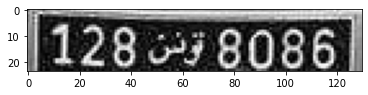

In [55]:
gray = cv2.imread(PLATES+"1.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(gray, cmap=plt.cm.gray)

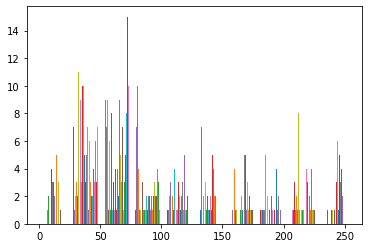

In [44]:
plt.hist(gray);

*Apply Niblack's local threshhold*

<class 'numpy.ndarray'>


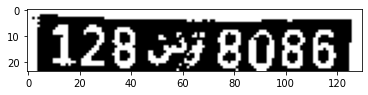

In [40]:
#Local binarization Niblack's
window_size = 25
thresh_niblack = threshold_niblack(gray, window_size=window_size, k=0)
binary_niblack = gray > thresh_niblack
plt.imshow(binary_niblack, cmap=plt.cm.gray)
print(type(binary_niblack))

In [0]:
#Seconf method
gray = gray * 255
threshold_value = threshold_otsu(gray)
binary_car_image = gray > threshold_value

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


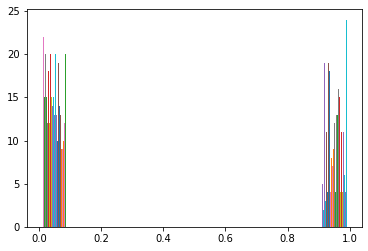

In [46]:
plt.hist(binary_niblack);

In [62]:
license_plate = np.invert(binary_car_image)
label_image = skimage.measure.label(license_plate)
print(label_image.shape[0])

24


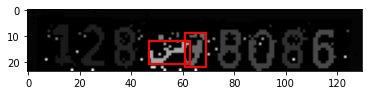

In [63]:
fig, ax1 = plt.subplots(1)
ax1.imshow(label_image, cmap="gray")
character_dimensions = (0.35*license_plate.shape[0], 0.60*license_plate.shape[0], 0.05*license_plate.shape[1], 0.15*license_plate.shape[1])
min_height, max_height, min_width, max_width = character_dimensions

characters = []
counter=0
column_list = []
for regions in regionprops(label_image):
    y0, x0, y1, x1 = regions.bbox
    region_height = y1 - y0
    region_width = x1 - x0

    if region_height > min_height and region_height < max_height and region_width > min_width and region_width < max_width:
        roi = license_plate[y0:y1, x0:x1]

        # draw a red bordered rectangle over the character.
        rect_border = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, edgecolor="red",
                                       linewidth=2, fill=False)
        ax1.add_patch(rect_border)

        # resize the characters to 20X20 and then append each character into the characters list
        resized_char = resize(roi, (20, 20))
        characters.append(resized_char)

        # this is just to keep track of the arrangement of the characters
        column_list.append(x0)
# print(characters)
plt.show()

First method with global threshhold

In [0]:
ctrs,_ = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(ctr) for ctr in ctrs]
digits = []
for rect in rects:
    x = rect[0]
    y = rect[1]
    w = rect[2]
    h = rect[3]
    crop_im = im[y:y+h, x:x+w]
    #if w > h:
    #    continue
    #if h < 15:
    #    continue
    digits.append(crop_im)
    plt.figure(figsize=(3,3))
    plt.imshow(crop_im)
    plt.show()

TypeError: ignored